In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
BASE_DIR = r'C:\Users\oicas\OneDrive\Desktop\Intro a las App de Algoritmos de ML y DL\Proyecto\Dataset\dataset_proyecto_final' 
IMG_SIZE = 224 # Tamaño para VGG16/ResNet
BATCH_SIZE = 32

In [13]:
def limpiar_imagenes(directorio):
    n_borradas = 0
    for carpeta in os.listdir(directorio):
        ruta_carpeta = os.path.join(directorio, carpeta)
        if os.path.isdir(ruta_carpeta):
            for archivo in os.listdir(ruta_carpeta):
                ruta_archivo = os.path.join(ruta_carpeta, archivo)
                try:
                    img = cv2.imread(ruta_archivo)
                    if img is None:
                        os.remove(ruta_archivo)
                        n_borradas += 1
                except Exception as e:
                    os.remove(ruta_archivo)
                    n_borradas += 1
    print(f"Se eliminaron {n_borradas} imágenes corruptas.")

In [14]:
# Usamos validación split 80/20
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalizar píxeles a 0-1
    validation_split=0.2, # Reservar 20% para validar
    rotation_range=20,    # Rotar hasta 20 grados
    width_shift_range=0.2,# Mover horizontalmente
    height_shift_range=0.2,
    shear_range=0.2,      # Cizallamiento (deformar)
    zoom_range=0.2,       # Zoom aleatorio
    horizontal_flip=True, # Espejo horizontal
    fill_mode='nearest'   # Rellenar bordes creados
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [15]:
print("Cargando Set de Entrenamiento...")
train_gen = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # 'categorical' porque son >2 estilos
    subset='training',
    shuffle=True
)

print("Cargando Set de Validación...")
val_gen = val_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Cargando Set de Entrenamiento...
Found 25170 images belonging to 6 classes.
Cargando Set de Validación...
Found 6290 images belonging to 6 classes.


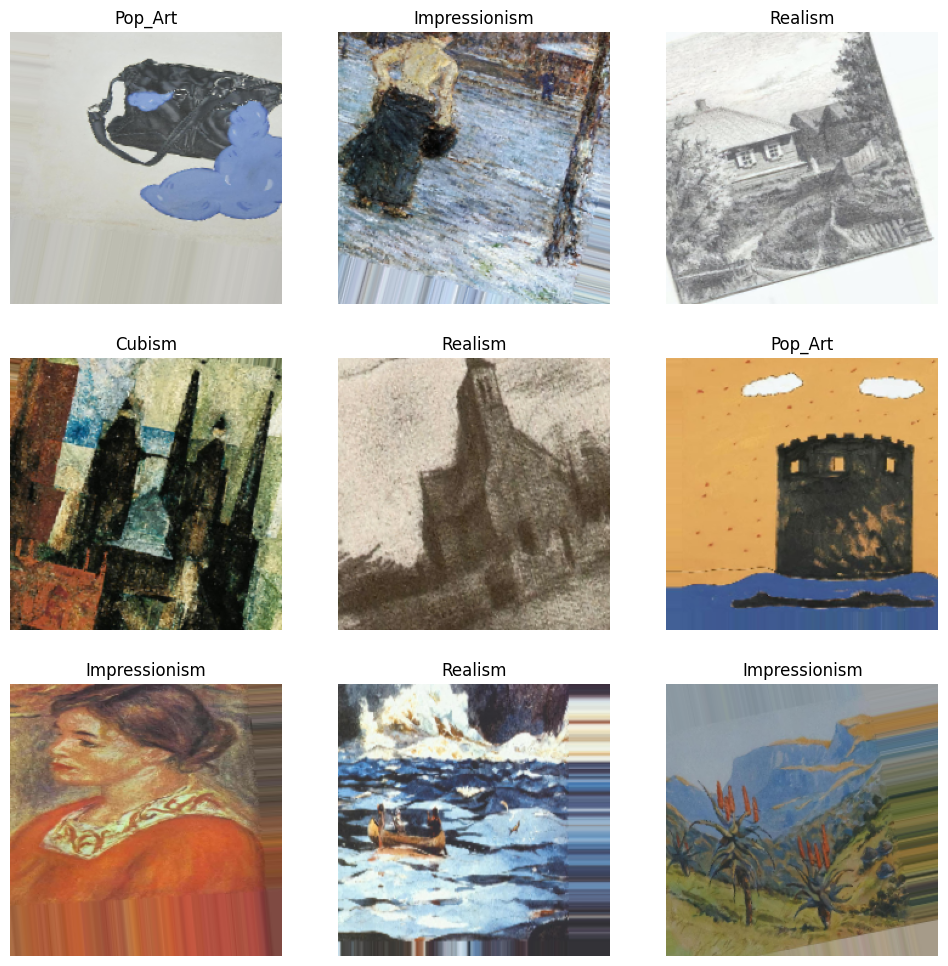

In [16]:
def visualizar_muestra(generador):
    # Obtener un lote
    imgs, labels = next(generador)
    # Mapeo de índices a nombres (ej: 0 -> Cubismo)
    clases = {v: k for k, v in generador.class_indices.items()}
    
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(imgs[i])
        # np.argmax convierte el vector one-hot ([0, 1, 0]) al índice (1)
        estilo = clases[np.argmax(labels[i])]
        plt.title(estilo)
        plt.axis('off')
    plt.show()

visualizar_muestra(train_gen)